<p><a name="intro"></a></p>

## Introducción:

El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

<ol>

  <li>Resumir las principales características del conjunto de datos.</li>
  <li>Entender mejor el conjunto de datos que se está tratando.</li>
  <li>Establecer relaciones entre variables.</li>
  <li>Determinar si una variables es un buen predictor de una variable target.</li>
  <li>Extraer las variables más importantes.</li>
</ol>

**Objetivo:** Determinar las características que más impactan en lo que se busca establecer.

Para abordar el análisis exploratorio de datos, es útil aplicar las siguientes técnicas que abordaremos en el presente notebook:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento: Método GroupBy()</li>  
  <li> Correlación de Pearson</li>
  <li> Mapas de correlación</li>
  <li> Análisis de variaciones: Anova</li>
</ol>

En primer lugar, carguemos el dataset de caractarísticas de carros que vamos a analizar.

In [0]:
import pandas as pd
import numpy as np

archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [2]:
#Apariencia de la tabla de datos
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [0]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [0]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

Por ejemplo, la variable "drive-wheels" describe la tracción de los vehiculos consignados en la tabla; son variables categóricas que representan:

<ol>
    <li>fwd - Front Wheel Drive: Tracción delantera.</li>
    <li>rwd - Rear Wheel Drive: Tracción Tracera.</li>
    <li>4wd - 4 Wheel Drive: Tracción de cuatro ruedas.</li>
</ol>

Para contabilizar esta variable usamos el método <code>.value_counts()</code>

In [0]:
# Para contabilizar variables categóricas:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

No obstante, esta función también permite contabilizar las variables numéricas. Por ejemplo, "width" representa el ancho de los carros:

In [0]:
df["width"].value_counts()

0.886111    24
0.923611    23
0.908333    15
0.950000    10
0.894444    10
0.888889     9
0.883333     9
0.909722     8
0.905556     7
0.933333     6
0.891667     6
0.920833     6
0.911111     6
0.929167     5
0.900000     4
0.956944     4
0.943056     4
0.912500     4
0.902778     3
0.995833     3
0.887500     3
0.991667     3
0.976389     3
0.897222     2
0.940278     2
0.966667     2
0.890278     2
0.918056     2
0.948611     2
0.944444     1
0.868056     1
0.916667     1
0.979167     1
0.880556     1
0.919444     1
0.858333     1
0.955556     1
0.980556     1
0.837500     1
0.922222     1
0.984722     1
0.925000     1
1.000000     1
Name: width, dtype: int64

<p><a name="bPlot"></a></p>

###  Box Plots

 

Los box plot representan gráficas en las que se pueden analizar varias características de un conjunto de datos como:

<ol>
    <li> La distribución de los datos.</li>
    <li> Asimetría.</li>
    <li> Los puntos aislados.</li>
</ol>

En la siguiente gráfica se muestran las diferentes partes de una gráfica de caja:

<img src="https://imgbb.com/"><img src="https://i.ibb.co/6tkRtg0/Captura-de-pantalla-2019-08-22-19-01-17.png" style="width:250px;height:300px;" alt="Captura-de-pantalla-2019-08-20-22-39-39" border="0"></a>

En esta gráfica, podemos identificar las siguiente cantidades:

<ol>
    <li> Mediana.</li><br>
    <li> Cuartil superior $P_{75}.$</li><br>
    <li> Cuartil inferior $P_{25}$</li><br>
    <li>Rango intercuartil $IQR=P_{75}-P_{25}$</li><br>
    <li>Extremo superior \[UE= \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}\]<br> </li><br>
    <li>Extremo inferior \[LE= \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}\]<br></li>
</ol>

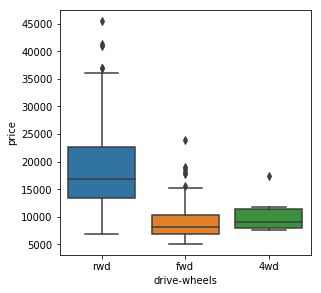

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4.5, 4.5))
sns.boxplot(x="drive-wheels",y="price", data=df)

En este caso se tiene que:

<ol>
    <li> Mediana: rwd $\rightarrow$ 16900, fwd $\rightarrow$ 8192 y 4wd$\rightarrow$9005.5</li><br>
    <li> Cuartil superior: $P_{75\text{-rwd}}\approx 22547.50$, $P_{75\text{-fwd}}\approx 10333$ y $P_{75\text{-4wd}}\approx 11368$</li><br>
    <li> Cuartil inferior: $P_{25\text{-rwd}}= 13455$, $P_{25\text{-fwd}}\approx 6951$ y $P_{25\text{-4wd}}\approx 7984$</li><br>
    <li>Rango intercuartil: $IQR_{\text{rwd}}\approx 9023$, $IQR_{\text{fwd}}\approx 3381$ y $IQR_{\text{4wd}}\approx 3384$</li><br>
    <li>Extremo superior \[UE= \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}\]<br>
        Por ejemplo, $UE_{\text{rwd}}= P_{\text{75}\text{rwd}}+1.5\times IQR_{\text{rwd}}\rightarrow UE_{\text{rwd}}=22547.50+(22547.50-13455.00)\times1.5 \therefore UE_{\text{rwd}}=36186.25$, ya que $UE_{\text{rwd}}<\text{max(Data)}$. </li><br>
    <li>Extremo inferior \[LE= \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}\]<br>
    Por ejemplo, $LE_{\text{rwd}}=\text{min(Data)}\rightarrow LE_{\text{rwd}}=6785$, ya que se cumple que $LO\leq \text{min(Data)}$. </li><br>
</ol>

In [0]:
df.groupby(["drive-wheels"]).price.describe()

,count,mean,std,min,25%,50%,75%,max
drive-wheels,,,,,,,,
4wd,8.0,10241.000000,3288.211064,7603.0,7984.25,9005.5,11367.75,17450.0
fwd,118.0,9244.779661,3345.898257,5118.0,6950.75,8192.0,10332.50,23875.0
rwd,75.0,19757.613333,9082.575728,6785.0,13455.00,16900.0,22547.50,45400.0


Los box plots, o diagramas de cajas permiten comparar facilmente diferentes grupos. En este ejemplo, mediante el uso de diagramas de cajas podemos ver diferentes categorías y sus distribuciones respecto al precio. 

Vemos que, por ejemplo, que el precio de los carros de tracción trasera (rwd) son distintos a los de otras categorias, no obstante, el precio de los carros de tracción delantera y $4\times4$ son casi indistinguibles.

<p><a name="sPlot"></a></p>

### Scatter plots



Dentro de nuestros datos podemos tener en varias ocaciones variables continuas. Este tipo de datos representan puntos dentro de un rango. En el conjunto de datos que estamos trabajando, por ejemplo, las variables correspondientes a las columnas **"price"** y **"engine-size"** son variables continuas. ¿Qué deberiamos hacer si queremos predecir el precio a partir del tamaño del motor?.

Una forma rápida para inspeccionar este tipo de relaciones consiste en realizar un scatter plot de ambas variables. Cada observación en el scatter plot es representada  como un punto. Este tipo de gráficas representa la relación ente ambas variables. La variable predictora representa la variable que se usa para predecir un determinado resultado. Por otra parte, la variable diana o blanco, corresponde a la variable que se pretende predecir. En nuestro caso tenemos que:

<ol>
    <li>Variable target
    : "price".</li>
    <li>Variable predictora: "engine-size".</li>
</ol>

En una gráfica de dispersión, usualmente el eje x, o eje horizontal, se hace coincidir con la variable predictora y el eje y, o eje vertical, con la variable target.

Veamos ahora como se relacionan las variables "price" y "engine-size".

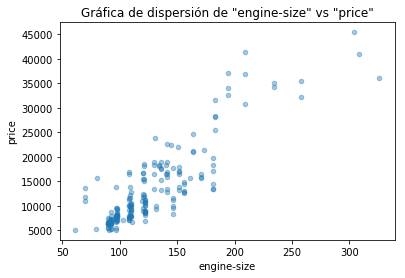

In [0]:
df.plot(kind="scatter", y = "price", x = "engine-size", title = "Gráfica de dispersión de \"engine-size\" vs \"price\"", alpha = 0.4)

<p><a name="corr"></a></p>

##  Correlación


La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

Existen algunos tipos comunes de pruebas para medir la correlación, estos son: Pearson, Spearman y Kendall. Cada uno tiene sus propias suposiciones sobre los datos que deben cumplirse para que la prueba pueda medir con precisión el nivel de correlación. Veamos cómo están distribuidas nuestras variables:

* Para la correlación de Pearson, ambas variables deben estar normalmente distribuidas. Otras suposiciones incluyen linealidad y homogeneidad en la varianza.

* La correlación de Kendall es una prueba no paramétrica que no hace suposiciones sobre la distribución de los datos. Debe haber una relación monotónica entre las variables que se están probando y los datos deben medirse en una escala ordinal, de intervalo o de relación.

* Las correlación de Spearman es no paramétrica y no hace suposiciones sobre la distribución de los datos. Al igual que en el caso anterior, debe haber una relación monotónica entre las variables y es el análisis de correlación apropiado cuando las variables se miden en una escala que es al menos ordinal.

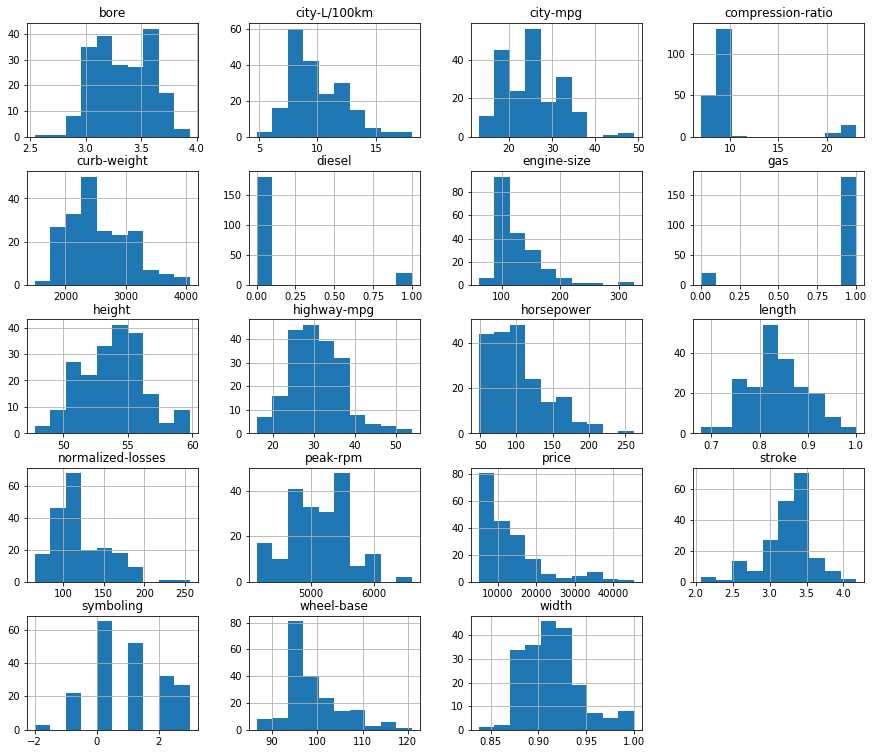

In [0]:
df.hist(figsize=(15,13))
plt.show()

En el caso de la correlación de Pearson, las suposiciones de normalidad de la distribución y homogeneidad de la varianza se pueden evaluar mediante las funciones `skewtest()` y `levene()`, respectivamente. Ambas pertenecientes al módulo `scipy.stats`. Evaluemos las suposiciones para las variables "price" y "engine-size"

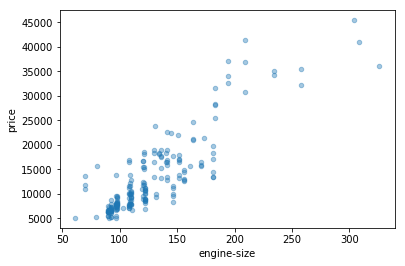

In [0]:
# test linearity
df.plot(kind="scatter", y = "price", x = "engine-size", alpha = 0.4)

In [0]:
# lo usamos para descartar pearson

from scipy.stats import skewtest, levene

 
#pruebe la hipótesis nula de que la asimetría de la población de la que se extrajo la muestra es la misma que la de una distribución normal correspondiente
print(skewtest(df["price"]))
print(skewtest(df["engine-size"]))

# probar la hipótesis nula de que todas las muestras de entrada provienen de poblaciones con igual varianza, me dice si las varaianzas son homogeneas o no 
print(levene(df["price"],df["engine-size"]))

# Un valor p menor significa que hay evidencia más fuerte a favor de la hipótesis alternativa.

SkewtestResult(statistic=7.639137730516152, pvalue=2.186812829722033e-14)
SkewtestResult(statistic=8.058856418726215, pvalue=7.701148913242647e-16)
LeveneResult(statistic=140.81734743196424, pvalue=4.916938115048979e-28)


Observamos que sí hay una relación lineal entre las variables. Sin embargo, los tests de uniformidad de la distribución y homogeneidad arrojan resultados negativos. Por lo tanto, la prueba de correlación apropiada para usar sería una prueba no paramétrica como la correlación de Spearman o de Kendall.

Para calcular el coeficiente de correlación podemos utilizar el método `corr()` de Pandas

In [0]:
corr_p = df.corr()
corr_k = df.corr(method = "kendall")
corr_s = df.corr(method = "spearman")

corr_p

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


Veamos cómo se correlaciona el atributo precio con los demás atributos

In [0]:
corr_p["price"].sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809575
city-L/100km         0.789898
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
height               0.135486
normalized-losses    0.133999
diesel               0.110326
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101616
gas                 -0.110326
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64

In [0]:
corr_k["price"].sort_values(ascending=False)

price                1.000000
curb-weight          0.744265
horsepower           0.664788
engine-size          0.661342
city-L/100km         0.661282
width                0.638911
length               0.636420
wheel-base           0.540313
bore                 0.489625
height               0.182387
normalized-losses    0.134911
diesel               0.118449
stroke               0.094153
peak-rpm            -0.048705
symboling           -0.104866
gas                 -0.118449
compression-ratio   -0.136957
highway-mpg         -0.651805
city-mpg            -0.661282
Name: price, dtype: float64

Vemos que el precio del automóvil tiende a subir a medida que, por ejemplo, aumenta el tamaño del motor (engine-size), el ancho (width) y largo (length) del vehículo; no así de su altura (heigth) o del tipo de combustible que utiliza. El atributo más prometedor para predecir el precio del vehículo es el tamaño del motor (Pearson) y el peso del motor (kendall).

Otra forma de verificar la correlación entre los atributos es usar el método `scatter_matrix`, que dibuja cada atributo numérico contra cualquier otro atributo numérico. Como tenemos 29 columnas (se generarían $29^2=841$ gráficos), grafiquemos solo algunos de los atributos que tienen más correlación con el precio:

La diagonal principal estaría llena de líneas rectas si Pandas dibujara cada variable contra sí misma, lo que no sería muy útil. En su lugar, Pandas muestra un histograma de cada atributo.

La librería `seaborn` nos permite realizar gráficos como el anterior o, por ejemplo, en un mapa de calor, mediante las funciones `pairplot()` y `heatmap()`, respectivamente.

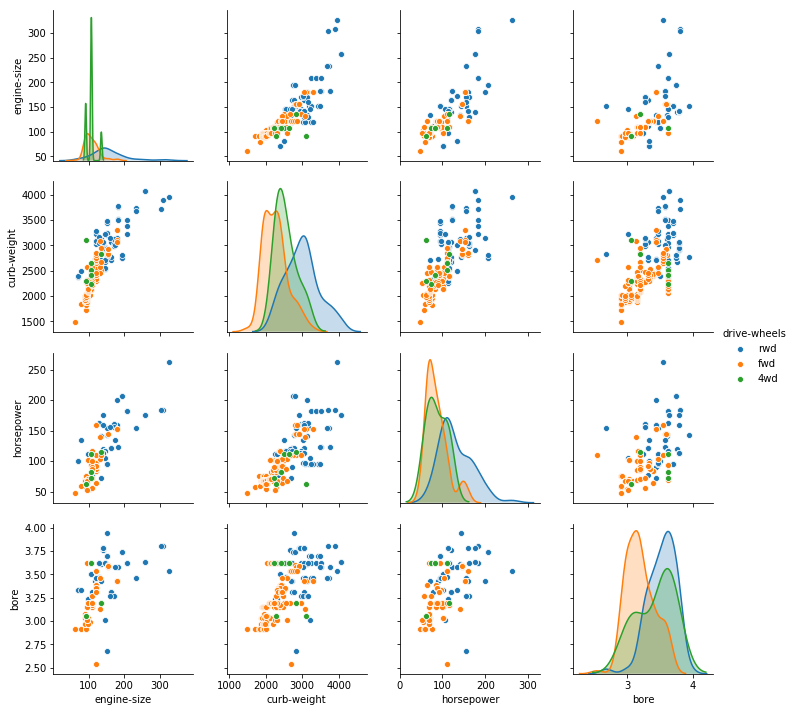

In [0]:
sns.pairplot(df, hue = "drive-wheels", vars = ["engine-size","curb-weight","horsepower","bore"])

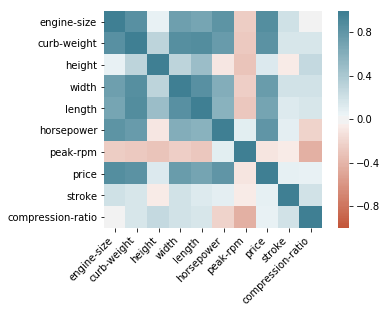

In [0]:
df_new = df[['engine-size','curb-weight','height','width','length','horsepower','peak-rpm','price','stroke','compression-ratio']]
corr_new = df_new.corr()

ax = sns.heatmap(
    corr_new, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

<p><a name="anova"></a></p>

##  Análisis de varianza (ANOVA)

El análisis de varianza es un método estadístico que se usa para probar si existe diferencias significativas entre las medias de dos o mas grupos. ANOVA arroja como resultados dos parámetros:

<ol>
    <li>F-test score: En ANOVA se asume que todos los valores medios de los diferentes grupos son el mismo, se calcula que tanto se desvia de este supuesto y se reporta por medio del puntaje F-test. Entre más grande sea este valor, mayor diferencia existirá entre los valores medios.</li>
    <li>P-Value: Este valor nos indica que tanta significancia estadística tienen nuestro puntaje.</li>
</ol>

Si la variable precio que estamos analizando esta fuertemente correlacionada con una variable, esperamos que ANOVA nos devuelva un puntaje razonable del F-test y un valor pequeño del P-Value.

<p><a name="modelado"></a></p>

###  ANOVA para creación de modelos



Podemos usar éste método para crear modelos con diferentes variables y ver su influencia en la predicción.

Crearémos un modelo para ver si algunas variables tienen relación con el precio (es decir qué tanto poder predictivo tienen).

Empecemos por la potencia del auto:

In [0]:
import statsmodels.api as sm
from statsmodels.formula.api import ols #Ordinary linear squares

anova_hp=ols('price ~ horsepower', data=df).fit() 
sm.stats.anova_lm(anova_hp)

,df,sum_sq,mean_sq,F,PR(>F)
horsepower,1.0,7.781023e+09,7.781023e+09,349.82655,2.686405e-45
Residual,194.0,4.315048e+09,2.224252e+07,NaN,NaN


In [0]:
anova_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     349.8
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           2.69e-45
Time:                        07:12:03   Log-Likelihood:                -1935.0
No. Observations:                 196   AIC:                             3874.
Df Residuals:                     194   BIC:                             3881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4879.5060   1018.331     -4.792      0.000   -6887.928   -2871.084
horsepower   175.4056      9.378     18.704      0.000     156.909     193.902
==============================================================================
Omnibus:                       33.233   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.147
Skew:                           0.925   Prob(JB):                     4.75e-12
Kurtosis:                       4.721   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos acceder a intervalos de confianza en nuestra predicción usando la función *wls_prediction_std*

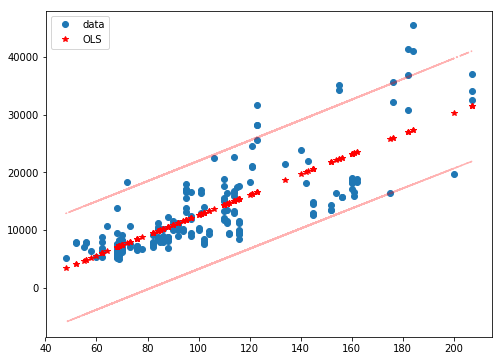

In [0]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

_, iv_l, iv_u = wls_prediction_std(anova_hp)

plt.figure(figsize=(8,6))
plt.plot(df.horsepower, df.price, 'o', label="data")
plt.plot(df.horsepower, anova_hp.fittedvalues, 'r*', label="OLS")
plt.plot(df.horsepower, iv_u, 'r-.',alpha=0.3)
plt.plot(df.horsepower, iv_l, 'r-.',alpha=0.3)
plt.legend(loc='upper left')
plt.show()

Podemos crear modelos también con la combinación de varias variables, e incluso usar variables categóricas anteponiendo una *C* al nombre, y el método se encargará de su conversión a numérica.

In [0]:
anova_cat=ols('price ~ C(make)+horsepower', data=df).fit()
sm.stats.anova_lm(anova_cat)

,df,sum_sq,mean_sq,F,PR(>F)
C(make),21.0,9.562833e+09,4.553730e+08,78.074525,8.478506e-77
horsepower,1.0,1.524208e+09,1.524208e+09,261.328137,2.045085e-36
Residual,173.0,1.009030e+09,5.832543e+06,NaN,NaN


Statsmodels nos permite acceder a varias cantidades de interés para el modelo.

Puede acceder atodas las opciones en la [documentación](http://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.RegressionResults.html)


In [0]:
print('Parametros: ', anova_cat.params[:5])
print('Errores estándar: ', anova_cat.bse[:5])
print('Valores predichos: ', anova_cat.predict()[0:5])
print('R2: ', anova_cat.rsquared)
print('Valores p:', anova_cat.pvalues[:5])

Parametros:  Intercept               1980.185790
C(make)[T.audi]         3529.290235
C(make)[T.bmw]          9159.845539
C(make)[T.chevrolet]   -2732.259562
C(make)[T.dodge]       -3416.444042
dtype: float64
Errores estándar:  Intercept               1625.870928
C(make)[T.audi]         1709.238394
C(make)[T.bmw]          1637.501759
C(make)[T.chevrolet]    2015.733307
C(make)[T.dodge]        1630.935300
dtype: float64
Valores predichos:  [13952.37497065 13952.37497065 18590.25005869 16510.94716433
 17913.09544676]
R2:  0.9165820092943603
Valores p: Intercept               2.249117e-01
C(make)[T.audi]         4.043085e-02
C(make)[T.bmw]          8.539622e-08
C(make)[T.chevrolet]    1.770358e-01
C(make)[T.dodge]        3.764748e-02
dtype: float64


Notemos que sm.stats no nos devuelve el valor F para todo el modelo, solo la contribución de cada variable, para ello usamos el método *summary*.

In [0]:
anova_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     86.40
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           2.46e-81
Time:                        06:09:04   Log-Likelihood:                -1792.6
No. Observations:                 196   AIC:                             3631.
Df Residuals:                     173   BIC:                             3707.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1980.1858   1625.871      1.218      0.225   -1228.912    5189.283
C(make)[T.audi]           3529.2902   1709.238      2.065      0.040     155.644    6902.936
C(make)[T.bmw]            9159.8455   1637.502      5.594      0.000    5927.792    1.24e+04
C(make)[T.chevrolet]     -2732.2596   2015.733     -1.355      0.177   -6710.856    1246.337
C(make)[T.dodge]         -3416.4440   1630.935     -2.095      0.038   -6635.537    -197.351
C(make)[T.honda]         -2448.9885   1575.879     -1.554      0.122   -5559.413     661.436
C(make)[T.isuzu]         -2123.7208   2221.825     -0.956      0.340   -6509.095    2261.653
C(make)[T.jaguar]         1.294e+04   2230.410      5.800      0.000    8534.564    1.73e+04
C(make)[T.mazda]          -485.1305   1578.584     -0.307      0.759   -3600.894    2630.633
C(make)[T.mercedes-benz]  1.589e+04   1640.952      9.685      0.000    1.27e+04    1.91e+04
C(make)[T.mercury]       -4352.2588   2808.297     -1.550      0.123   -9895.196    1190.678
C(make)[T.mitsubishi]    -3965.8996   1553.368     -2.553      0.012   -7031.893    -899.906
C(make)[T.nissan]        -2625.9111   1513.706     -1.735      0.085   -5613.622     361.799
C(make)[T.peugot]         2742.7596   1582.211      1.733      0.085    -380.164    5865.683
C(make)[T.plymouth]      -3369.5485   1686.355     -1.998      0.047   -6698.028     -41.069
C(make)[T.porsche]        8819.5202   1895.857      4.652      0.000    5077.532    1.26e+04
C(make)[T.renault]       -3630.0006   2209.124     -1.643      0.102   -7990.306     730.305
C(make)[T.saab]           -418.8101   1707.733     -0.245      0.807   -3789.484    2951.864
C(make)[T.subaru]        -2741.6504   1580.577     -1.735      0.085   -5861.348     378.048
C(make)[T.toyota]        -2101.5325   1474.320     -1.425      0.156   -5011.503     808.437
C(make)[T.volkswagen]     -648.1363   1586.629     -0.408      0.683   -3779.779    2483.506
C(make)[T.volvo]          2277.2283   1573.127      1.448      0.150    -827.765    5382.221
horsepower                 107.8576      6.672     16.166      0.000      94.689     121.027
==============================================================================
Omnibus:                       53.864   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.694
Skew:                           1.126   Prob(JB):                     3.47e-35
Kurtosis:                       6.790   Cond. No.                     4.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+03. This might indicate that there are
strong m